In [3]:
import random as rd
import numpy as np
import scipy as sp

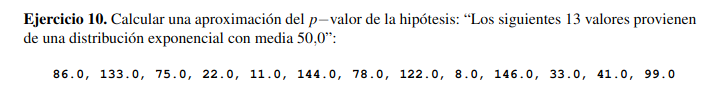

In [4]:
"""  
Toma los datos observados y la funcion de distribucion acomulada
de la distribucion que se quiere probar.
"""
def estadistico_K_S(data):
    data.sort()
    n = len(data)
    D = []
    for i in range(n):
        F_yj = sp.stats.expon.cdf(data[i],scale=1/0.02)
        izq = (i+1)/n - F_yj
        der = F_yj - i/n
        D.append(max(izq, der))
    return max(D)

def estadistico_K_S_uniform(data):
    data.sort()
    n = len(data)
    d_j = 0
    for j in range(n):
        u_j = data[j]
        d_j = max(d_j, (j+1)/n - u_j , u_j - j/n)
    return d_j

En este caso mi funcion F sera la funcion de distribucion acomulada de la exponencial con parametro $50 = \frac{1}{\lambda}$, $\lambda = 0.02$

In [5]:
def estimar_pvalor(nsims, data):
    n = len(data)
    d_obs = estadistico_K_S(data)
    p_v = 0
    
    for _ in range(nsims):
        u_m = np.random.uniform(0, 1, n) # genero la nueva muestra
        d_j = estadistico_K_S_uniform(u_m)
        if d_j >= d_obs:
            p_v += 1
    return p_v/nsims

In [17]:
data = [86.0, 133.0, 75.0, 22.0, 11.0, 144.0, 78.0, 122.0, 8.0, 146.0, 33.0, 41.0, 99.0]
nsims = 10000
print(estadistico_K_S(data))
print(estimar_pvalor(nsims, data))

0.3922544552361856
0.027


In [7]:
sp.stats.kstest(data, sp.stats.expon.cdf, args=(0, 1/0.02))

KstestResult(statistic=0.3922544552361856, pvalue=0.025889298597310706, statistic_location=75.0, statistic_sign=-1)